In [1]:
# 下面是一个简单的汽车走走停停的例子，打印其走停的时间戳：
class Car(object): # 定义一个新的类 Car，继承自基类 object。
    
    def __init__(self, env): # __init__ 方法初始化 Car 对象。它接收一个参数 env，即 simpy.Environment 的一个实例。当创建 Car 实例时，run 方法会作为一个进程传递给环境。
        self.env = env
        # 每次创建实例时启动运行过程
        self.action = env.process(self.run())
        
    def run(self): # run 方法是一个生成器函数（使用 yield 的函数）。它包含一个无限循环（while True），使得汽车在停车/充电和驾驶之间交替进行。
        while True:
            print('Start parking and charging at %d' % self.env.now) # 打印当前时间，表示开始停车和充电。
            charge_duration = 5 # 定义充电时间为 5 个单位。
            # 我们 yield process() 返回的进程，以等待其完成
            # yield self.env.process 作用：启动并等待一个新的进程完成。
            # 用法：用于启动一个新的生成器函数（即一个进程），并挂起当前的进程，直到这个新进程完成。
            yield self.env.process(self.charge(charge_duration)) # 调用 charge 方法，传递充电时间作为参数。charge 方法是一个生成器函数，它会等待一段时间，然后返回。

            # 充电过程完成后，我们可以开始驾驶
            print('Start driving at %d' % self.env.now) # 打印当前时间，表示开始驾驶。
            trip_duration = 2 # 定义行驶时间为 2 个单位。
            # yield self.env.timeout 作用：使当前进程等待指定的时间。 用法：用于挂起当前的进程，直到经过指定的时间。 
            # 例子：假设一个汽车的进程，它需要等待一定的时间（模拟充电时间或行驶时间）。
            yield self.env.timeout(trip_duration) # 使用 timeout() 方法等待行驶时间。
            
    def charge(self, duration): # 定义 charge 方法，接收一个参数 duration。
        yield self.env.timeout(duration) # 使用 timeout() 方法等待 duration 时间。


In [4]:
import simpy
env = simpy.Environment() # 创建一个 simpy.Environment 实例。
car = Car(env) # 创建一个 Car 实例。
# env.run(until=15) # 运行环境，直到时间达到 15 个单位。
env.run(until=30) # 运行环境，直到时间达到 15 个单位。

Start parking and charging at 0
Start driving at 5
Start parking and charging at 7
Start driving at 12
Start parking and charging at 14
Start driving at 19
Start parking and charging at 21
Start driving at 26
Start parking and charging at 28


In [7]:
import simpy # 导入 simpy 模块，这是一个用于离散事件模拟的 Python 库。

# 定义一个名为 clock 的函数，它模拟一个时钟。函数的参数包括：

# env：simpy.Environment 实例，表示模拟环境。
# name：时钟的名字，用于区分不同的时钟。
# tick：时钟的周期，表示时钟每次跳动的时间间隔。
# 函数主体是一个无限循环（while True），在每次循环中：

# 打印时钟的名字和当前模拟时间（env.now）。
# 使用 yield env.timeout(tick) 暂停进程 tick 时间单位。
def clock(env, name, tick):
    
    while True:
        print(name, env.now)
        yield env.timeout(tick)
        
env = simpy.Environment() # 创建一个 simpy.Environment 实例 env，用于管理和运行模拟过程。

# 创建并启动一个名为 'fast' 的时钟进程，每 0.5 时间单位跳动一次。env.process 会将 clock 函数封装成一个进程对象并返回。
env.process(clock(env, 'fast', 0.5)) 

# 创建并启动一个名为 'slow' 的时钟进程，每 1 时间单位跳动一次。同样地，env.process 会将 clock 函数封装成一个进程对象并返回。
env.process(clock(env, 'slow', 1))

env.process(clock(env, 'aaa', 0.1))

# 运行模拟环境 env，直到模拟时间达到 2 单位时间。
env.run(until=20)



fast 0
slow 0
aaa 0
aaa 0.1
aaa 0.2
aaa 0.30000000000000004
aaa 0.4
fast 0.5
aaa 0.5
aaa 0.6
aaa 0.7
aaa 0.7999999999999999
aaa 0.8999999999999999
aaa 0.9999999999999999
slow 1
fast 1.0
aaa 1.0999999999999999
aaa 1.2
aaa 1.3
aaa 1.4000000000000001
fast 1.5
aaa 1.5000000000000002
aaa 1.6000000000000003
aaa 1.7000000000000004
aaa 1.8000000000000005
aaa 1.9000000000000006
slow 2
fast 2.0
aaa 2.0000000000000004
aaa 2.1000000000000005
aaa 2.2000000000000006
aaa 2.3000000000000007
aaa 2.400000000000001
fast 2.5
aaa 2.500000000000001
aaa 2.600000000000001
aaa 2.700000000000001
aaa 2.800000000000001
aaa 2.9000000000000012
slow 3
fast 3.0
aaa 3.0000000000000013
aaa 3.1000000000000014
aaa 3.2000000000000015
aaa 3.3000000000000016
aaa 3.4000000000000017
fast 3.5
aaa 3.5000000000000018
aaa 3.600000000000002
aaa 3.700000000000002
aaa 3.800000000000002
aaa 3.900000000000002
slow 4
fast 4.0
aaa 4.000000000000002
aaa 4.100000000000001
aaa 4.200000000000001
aaa 4.300000000000001
aaa 4.4
fast 4.5
aaa 4.

In [9]:
import simpy
import time

def clock(env, name, tick):
    while True:
        # 注释掉打印语句以减少 I/O 开销
        # print(name, env.now)
        yield env.timeout(tick)

def run_simulation(num_processes, until_time):
    env = simpy.Environment()
    for i in range(num_processes):
        env.process(clock(env, f'clock_{i}', 1))
    start_time = time.time()
    env.run(until=until_time)
    end_time = time.time()
    return end_time - start_time

# 设置初始进程数量和模拟时间
num_processes = 1000
simulation_time = 10

# 测试计算机能够处理的最大进程数量
while True:
    try:
        elapsed_time = run_simulation(num_processes, simulation_time)
        print(f'Number of processes: {num_processes}, Elapsed time: {elapsed_time:.2f} seconds')
        num_processes *= 2  # 每次将进程数量翻倍
    except MemoryError:
        print(f'Memory error encountered with {num_processes} processes.')
        break
    except Exception as e:
        print(f'An error occurred: {e}')
        break


Number of processes: 1000, Elapsed time: 0.01 seconds
Number of processes: 2000, Elapsed time: 0.02 seconds
Number of processes: 4000, Elapsed time: 0.04 seconds
Number of processes: 8000, Elapsed time: 0.09 seconds
Number of processes: 16000, Elapsed time: 0.18 seconds
Number of processes: 32000, Elapsed time: 0.38 seconds
Number of processes: 64000, Elapsed time: 0.78 seconds
Number of processes: 128000, Elapsed time: 1.65 seconds
Number of processes: 256000, Elapsed time: 3.55 seconds
Number of processes: 512000, Elapsed time: 7.32 seconds
Number of processes: 1024000, Elapsed time: 14.77 seconds


KeyboardInterrupt: 

In [12]:
# 定义函数 car，参数为 env（SimPy 环境），name（车辆名字），bcs（充电站），driving_time（驾驶时间），和 charge_duration（充电时间）。
def car(env, name, bcs, driving_time, charge_duration):
    # 模拟开车到充电站 使用 SimPy 的 timeout 方法来模拟驾驶时间。当驾驶时间结束后，代码继续执行。
    yield env.timeout(driving_time)
    # 使用 SimPy 的 timeout 方法来模拟驾驶时间
    # 当驾驶时间结束后，代码继续执行

    # 请求一个充电站的充电点 打印当前时间和车辆名字，表示车辆到达充电站。
    print('%s arriving at %d' % (name, env.now))
    # 打印当前时间和车辆名字，表示车辆到达充电站 请求一个充电站的充电点。当充电点空闲时，代码继续执行。
    with bcs.request() as req:
        yield req
        # 请求一个充电站的充电点，当充电点空闲时，代码继续执行 等待请求到充电点。当充电点空闲时，代码继续执行。

        # 给电池充电  打印当前时间和车辆名字，表示开始充电。
        print('%s starting to charge at %s' % (name, env.now))
        # 打印当前时间和车辆名字，表示开始充电 使用 SimPy 的 timeout 方法来模拟充电时间。当充电时间结束后，代码继续执行。
        yield env.timeout(charge_duration)
        # 使用 SimPy 的 timeout 方法来模拟充电时间
        # 当充电时间结束后，代码继续执行 打印当前时间和车辆名字，表示车辆离开充电站。
        print('%s leaving the bcs at %s' % (name, env.now))
        # 打印当前时间和车辆名字，表示车辆离开充电站
        
import simpy # 创建SimPy环境 导入 SimPy 库，这是一个用于离散事件模拟的 Python 库。


env = simpy.Environment() # 创建一个 SimPy 环境对象 env，用于管理模拟过程中的事件调度和执行。

# 创建一个充电站资源对象 bcs，该资源对象有2个充电点（容量为2）。simpy.Resource 需要传入环境对象 env 和资源容量 capacity。
bcs = simpy.Resource(env, capacity=2) # 创建一个充电站资源对象，容量为2 # 
# 使用一个循环为4辆车创建进程，每辆车都是一个独立的 SimPy 进程：

# 使用一个循环为4辆车创建进程，每辆车都是一个独立的 SimPy 进程：
for i in range(4): # 为4辆车创建进程
    # 使用 env.process 方法将 car 函数转换为一个 SimPy 进程，并传入相应的参数：
    # env：SimPy 环境。
    # 'Car %d' % i：生成车的名字，例如 Car 0, Car 1 等。
    # bcs：充电站资源对象。
    # i*2：驾驶时间，根据循环变量 i 生成，分别为 0, 2, 4, 6。
    # 5：充电时间，所有车的充电时间都是5个单位时间。
    env.process(car(env, 'Car %d' % i, bcs, i*2, 5))
env.run()

Car 0 arriving at 0
Car 0 starting to charge at 0
Car 1 arriving at 2
Car 1 starting to charge at 2
Car 2 arriving at 4
Car 0 leaving the bcs at 5
Car 2 starting to charge at 5
Car 3 arriving at 6
Car 1 leaving the bcs at 7
Car 3 starting to charge at 7
Car 2 leaving the bcs at 10
Car 3 leaving the bcs at 12


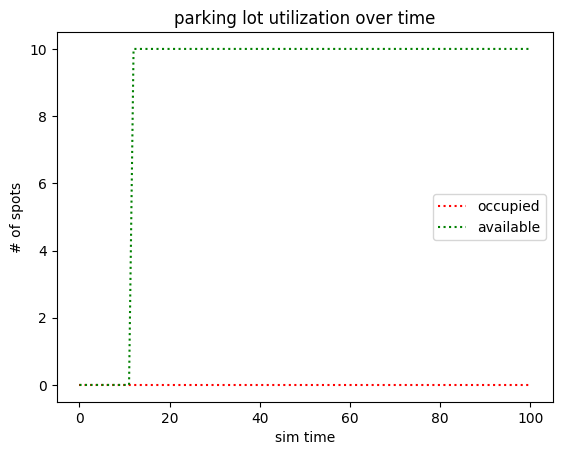

In [22]:
import numpy as np
import random # 导入 random 模块，用于生成随机数。

class Simdata:
    duration          :int
    data_timeseries   :np.ndarray

    def __init__(self, 
                 duration:int):
        """ constructor """
        
        self.duration = duration
        # 将传入的模拟持续时间 duration 赋值给实例变量 self.duration
        
        self.data_timeseries = np.zeros(duration+1, dtype=float)
        # 创建一个 numpy 数组 self.data_timeseries，形状为 (duration+1)，
        # 数据类型为 float，用于存储模拟时间序列的数据


class ParkingLot:
    env                  :simpy.Environment
    capacity             :int
    spots                :simpy.resources.container.Container
    spots_occupied       :int
    spots_available      :int
    simdata              :Simdata

    # 定义 __init__ 方法（构造函数），接受三个参数 env、capacity 和 duration，类型分别是 simpy.Environment、int 和 int。
    def __init__(self, 
                 env     :simpy.Environment, 
                 capacity:int, 
                 duration:int):
        """ constructor """
        
        self.env = env
        # 将传入的 SimPy 环境对象 env 赋值给实例变量 self.env
        
        self.capacity = capacity
        # 将传入的停车场容量 capacity 赋值给实例变量 self.capacity
        
        self.spots = simpy.resources.container.Container(env, capacity, init=capacity)
        # 使用 SimPy 的 Container 资源创建一个新的容器对象 self.spots，
        # 初始容量和最大容量都设置为传入的 capacity
        
        self.spots_occupied = 0
        # 初始化停车场占用的停车位数量为 0
        
        self.spots_available = capacity
        # 初始化停车场可用的停车位数量为 capacity
        
        self.simdata = Simdata(duration=duration)
        # 创建一个 Simdata 对象 self.simdata，并传入模拟的持续时间 duration
        
        self.simdata.data_timeseries = np.zeros([duration+1, 3], dtype=int)
        # 创建一个 numpy 数组 self.simdata.data_timeseries，形状为 (duration+1, 3)，
        # 数据类型为 int，用于存储模拟时间序列的数据
        
        
        
    def monitor_parkingspot(self) -> None:
        # 定义一个名为 monitor_parkingspot 的方法，返回类型为 None

        while self.env.now <= self.simdata.duration:
            # 当模拟环境的当前时间小于等于模拟数据的持续时间时，执行循环

            self.simdata.data_timeseries[self.env.now, 0] = self.env.now
            # 将当前时间 self.env.now 存储到模拟数据的时间序列的第0列

            self.simdata.data_timeseries[self.env.now, 1] = self.spots_occupied
            # 将当前占用的停车位数 self.spots_occupied 存储到模拟数据的时间序列的第1列

            self.simdata.data_timeseries[self.env.now, 2] = self.spots_available
            # 将当前可用的停车位数 self.spots_available 存储到模拟数据的时间序列的第2列

            yield self.env.timeout(1)
            # 暂停1个时间单位，然后继续执行循环


    def car_arrival(self, 
                    car_id        :int, 
                    dwelltime_min :float, 
                    dwelltime_max :float
                ) -> None:
        """
        implement simpy process;
        models car arrivals in the parking lot, occupying a slot for a randomly distributed duration
        方法的文档字符串，说明这个方法实现了一个 SimPy 进程，用于模拟车辆到达停车场并随机停留一段时间。
        """
        
        #print(f"Car {car_id} arrives at {self.env.now}")
        # 打印车辆到达时间

        yield self.spots.get(1)
        # 请求占用一个停车位，如果没有可用停车位，则等待
        # 请求占用一个停车位。如果没有可用停车位，进程会等待直到有空位。
        
        self.spots_occupied += 1
        # 增加已占用的停车位计数
        
        self.spots_available -= 1
        # 减少可用的停车位计数

        #print(f"Car {car_id} parks at {self.env.now}")
        # 打印车辆停车时间

        yield self.env.timeout(random.uniform(dwelltime_min, dwelltime_max))
        # 停车持续一个随机时间，时间范围在 dwelltime_min 和 dwelltime_max 之间
        # 进程暂停一段随机时间，这段时间在 dwelltime_min 和 dwelltime_max 之间。模拟车辆停留的时间。

        #print(f"Car {car_id} leaves at {self.env.now}")
        # 打印车辆离开时间

        self.spots_occupied -= 1
        # 减少已占用的停车位计数
        
        self.spots_available += 1
        # 增加可用的停车位计数

        yield self.spots.put(1)
        # 释放一个停车位

parking_lot = ParkingLot(env, capacity=10, duration=100) # 创建一个停车场对象 parking_lot，容量为 10，模拟持续时间为 100。
# for i in range(10): # 为10辆车创建进程
#     env.process(parking_lot.car_arrival(i)) # 使用 env.process 方法将 car_arrival 方法转换为一个 SimPy 进程，并传入相应的参数。

import simpy # 导入 simpy 模块，这是一个用于离散事件模拟的 Python 库。
import matplotlib  # 导入 matplotlib.pyplot 模块，用于绘图。
import matplotlib.pyplot as plt  # 导入 matplotlib.pyplot 模块，用于绘图。
env.process(parking_lot.monitor_parkingspot())
# 将 monitor_parkingspot 过程添加到模拟环境 env 中，使其开始运行

# run the model
env.run()
# 运行模拟环境 env，直到所有事件处理完毕

# plot simulation results
plt.plot(parking_lot.simdata.data_timeseries[:,1], linestyle='dotted', color="red", label="occupied")
# 绘制时间序列中第 1 列的数据，表示已占用的停车位数量，使用红色虚线，标签为 "occupied"

plt.plot(parking_lot.simdata.data_timeseries[:,2], linestyle='dotted', color="green", label="available")
# 绘制时间序列中第 2 列的数据，表示可用的停车位数量，使用绿色虚线，标签为 "available"

plt.legend()
# 显示图例

plt.xlabel("sim time")
# 设置 x 轴标签为 "sim time"

plt.ylabel("# of spots")
# 设置 y 轴标签为 "# of spots"

plt.title("parking lot utilization over time")
# 设置图表标题为 "parking lot utilization over time"

plt.show()
# 显示绘制的图表

NameError: name 'parking_lot' is not defined